[-4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627
 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627
 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627
 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627
 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627 -4.17351627]
[1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07 1.59329667e-07 1.59329667e-07
 1.59329667e-07 1.59329667e-07]
[4.17351452 4.17351452 4.17351452 4.17351452 4.17351452 4.17351452
 4.17351452 4.17351452 4.17351452 4.17351452 4.17351452 4.17351452
 4.17351452 4.17351452 4.17351452 4.17351

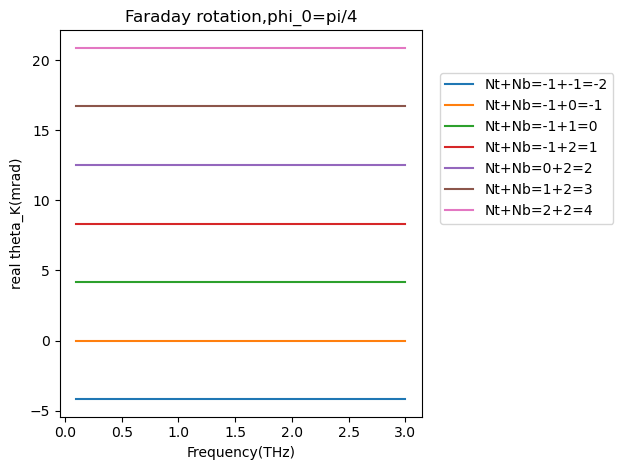

[20.86460503 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503
 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503
 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503
 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503
 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503 20.86460503] [ 3.87952798e-11  7.75905596e-11 -1.04599039e-09  1.55181119e-10
 -9.68399830e-10 -2.09198078e-09 -8.90809270e-10  3.10362238e-10
 -8.13218710e-10 -1.93679966e-09 -3.06038061e-09 -4.18396156e-09
 -6.58037591e-10 -1.78161854e-09  1.74430543e-09  6.20724477e-10
 -1.44513712e-08 -1.62643742e-09 -7.39952328e-09 -3.87359932e-09
 -3.47675353e-10 -6.12076122e-09 -1.18938471e-08 -8.36792311e-09
  4.45701068e-09 -1.31607518e-09  2.20984878e-09 -3.56323708e-09
 -9.33632294e-09  3.48861085e-09]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dask.array import arctan
from docutils.nodes import label
N=-2
for k in range(-1,3):
    for l in range(-1,3):
        N_temp=k+l
        if N_temp>N or N==-2:
            N=N_temp
            f = [0.1 * i*10**12 for i in range(1, 31)]  # 入射光频率
            k0 = [2 * np.pi * i for i in f]  # 真空波矢k0
            n = [1, 3.46, 10, 1]  # 定义各层波长
            d = [0, 10 ** -3, 10 * 10 ** -9, 0]  # 定义各层厚度,无限厚处设为0
            phi0 = np.pi / 4
            phi = [np.arcsin(n[0] / n[i] * np.sin(phi0)) for i in range(4)]  # 定义各层内角度
            Nt = k
            Nb = l
            sigma_xy_12 = 3.874 * 10 ** -5 / 2 + 3.874 * 10 ** -5 * Nt
            sigma_xy_23 = 3.874 * 10 ** -5 / 2 + 3.874 * 10 ** -5 * Nb
            sigma_xy_21 = -sigma_xy_12
            sigma_xy = [0, [0, 0, sigma_xy_12], [0, sigma_xy_21, 0, sigma_xy_23]]  # 定义各电导率，最后的列表只是为了函数调用方便
            mu0 = 4 * np.pi * 10 ** -7  # 真空磁导率
            c = 3 * 10 ** 8  # 真空光速
            P = [[np.exp(-1j * j * d[i] * n[i]) for i in range(4)] for j in k0]  # 传播


            def alpha(i, j):  # 中间变量
                return mu0 * c * sigma_xy[i][j]


            def beta(i, j):  # 中间变量
                return alpha(i, j) ** 2 * np.cos(phi[i]) * np.cos(phi[j]) / (
                            n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]))


            def gamma(i, j):  # 中间变量
                return alpha(i, j) ** 2 * np.cos(phi[i]) * np.cos(phi[j]) / (
                            n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j]))


            def T_trivial(i, j):  # 普通材料透射矩阵
                return np.array([[2 * n[i] * np.cos(phi[i]) / (n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j])), 0],
                                 [0, 2 * n[i] * np.cos(phi[i]) / (n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]))]])


            def T_TI(i, j):  # TI界面透射矩阵
                return np.array(
                    [[2 * n[i] * np.cos(phi[i]) / (n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j]) + beta(i, j)),
                      -2 * n[i] * beta(i, j) / alpha(i, j) / (
                              n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j]) + beta(i, j))],
                     [2 * n[i] * np.cos(phi[i]) / np.cos(phi[j]) * gamma(i, j) / alpha(i, j) / (
                             n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]) + gamma(i, j)),
                      (2 * n[i] * np.cos(phi[i]) - gamma(i, j)) / (
                              n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]) + gamma(i, j))]])


            def R_TI(i, j):  # TI界面反射矩阵
                return np.array([[(n[i] * np.cos(phi[i]) - n[j] * np.cos(phi[j]) - beta(i, j)) / (
                        n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j]) + beta(i, j)),
                                  -2 * n[i] * beta(i, j) / alpha(i, j) / (
                                          n[i] * np.cos(phi[i]) + n[j] * np.cos(phi[j]) + beta(i, j))],
                                 [-2 * n[i] * gamma(i, j) / alpha(i, j) / (
                                         n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]) + gamma(i, j)),
                                  (n[j] * np.cos(phi[i]) - n[i] * np.cos(phi[j]) + gamma(i, j)) / (
                                          n[j] * np.cos(phi[i]) + n[i] * np.cos(phi[j]) + gamma(i, j))]])


            def inverse_matrix(matrix):  # 求逆矩阵
                if not isinstance(matrix, np.ndarray):
                    matrix = np.array(matrix, dtype=np.complex128)  # 关键修复：使用复数类型

                if matrix.shape != (2, 2):
                    raise ValueError("输入必须为 2x2 矩阵")

                a, b = matrix[0]
                c, d = matrix[1]
                det = a * d - b * c

                if det == 0:
                    return None

                # 构造复数逆矩阵
                inv_matrix = np.array([[d, -b], [-c, a]], dtype=np.complex128) / det

                return inv_matrix if isinstance(matrix, np.ndarray) else inv_matrix.tolist()


            Ei = np.array([[1], [0]])

            E_Faraday_signal = [
                P[i][2] * P[i][1] * T_TI(2, 3) @ inverse_matrix(np.identity(2) - P[i][2] ** 2 * R_TI(2, 1) @ R_TI(2, 3))
                @ T_TI(1, 2) @ T_trivial(0, 1) @ Ei for i in range(30)]  # 不同频率下的Faraday信号
            theta_F = [np.arctan(E_Faraday_signal[i][1][0] / E_Faraday_signal[i][0][0]) * 1000 for i in
                       range(30)]  # 不同频率下的Faraday转角
            plt.plot(np.array(f)/10**12, np.real(theta_F), label='Nt+Nb=' + str(k) + '+' + str(l) + '=' + str(k + l))
            print(np.real(theta_F))
        else:
            continue

plt.legend(bbox_to_anchor=(1.05, 0.5), loc=3, borderaxespad=0)
plt.xlabel('Frequency(THz)')
plt.ylabel('real theta_K(mrad)')
plt.title('Faraday rotation,phi_0=pi/4')
plt.tight_layout()
plt.show()
print(np.real(theta_F),np.imag(theta_F))